# Orientations of Detector

This notebook explores the **THz peak amplitude** as a function of **detector angle**. The half-wave plate that sets the probe polarization is set to about $4^\circ$ from vertical. For some reason, if it is set exactly vertically, it is not possible to achieve balanced detection. Note that angles are defined counterclockwise from the vertical.

### Crystal zones in ZnTe
<img src="graphics/zincblende_orientations.png" alt="drawing" width="200"/>

### Polarization of THz as a function of pump polarization

<img src="graphics/thz_polatization.png" alt="drawing" width="400"/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

%matplotlib inline
plt.style.use('ggplot')

---
Emitter $\theta = -35^\circ$ (pump polarized along Zn-Te bond, $\langle \overline{1}11 \rangle$). Terahertz should in theory be horizontally polarized. Pump is filtered with one slab of Teflon *and a piece of Si* attached to a thin piece of Teflon.

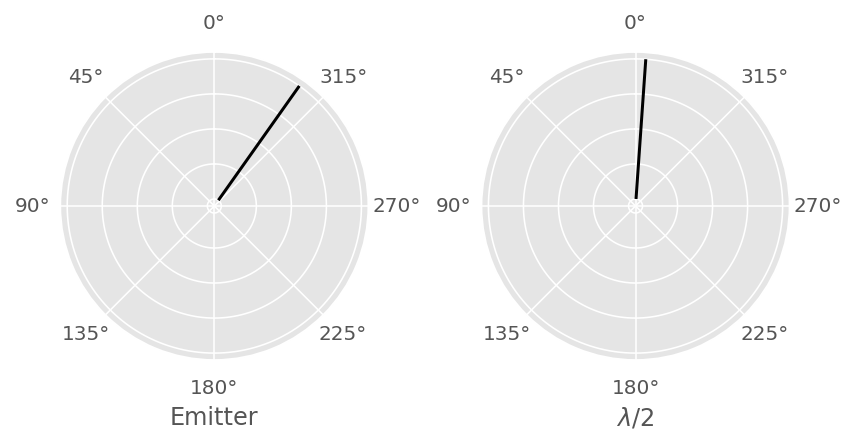

In [2]:
fig, axarr = plt.subplots(1, 2, figsize=(6,8), subplot_kw=dict(projection='polar'))
plt.tight_layout()
axarr[0].vlines(np.deg2rad(-35.3),0,2), axarr[1].vlines(-np.deg2rad(4),0,2)
axarr[0].set_theta_zero_location('N'), axarr[0].set_yticklabels([]), axarr[0].set_xlabel('Emitter');
axarr[1].set_theta_zero_location('N'), axarr[1].set_yticklabels([]), axarr[1].set_xlabel(r'$\lambda/2$');

In [3]:
%%capture
delay = np.loadtxt('data/emitter_-35deg_Si-filter/0.txt')[:,0]
delay -=  11.70
data = np.zeros((37, len(delay)))
amps = np.zeros(data.shape[0])

for i in range(data.shape[0]):
    filename = 'data/emitter_-35deg_Si-filter/{}'.format(10*i % 360) + '.txt'
    data[i, :] = np.flip(np.loadtxt(filename)[:,1])
    data[i, :] -= np.mean(data[i, 0:len(delay)//3])
    data[i, :] *= 10e5
    amps[i] = np.max(data[i, :])-np.min(data[i, :])
    data[i, :] = savgol_filter(data[i, :], 5, 2)

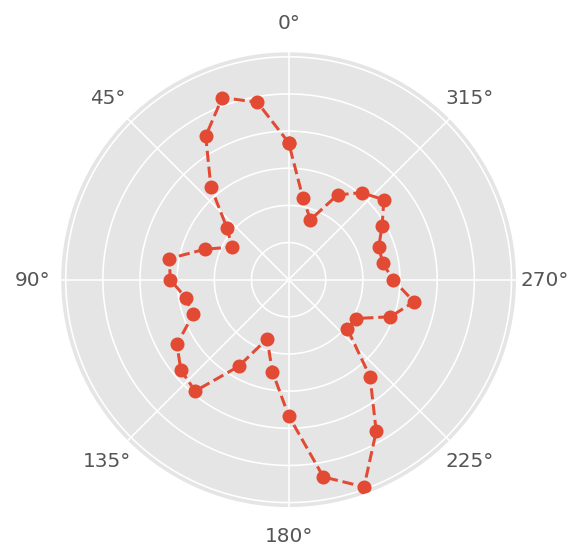

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location("N"), ax.set_yticklabels([]);
plt.plot(np.linspace(0, 2*np.pi, data.shape[0]), amps, marker='o', linestyle='--'), plt.tight_layout();

---
Emitter $\theta = -35^\circ$ (pump polarized along Zn-Te bond, $\langle \overline{1}11 \rangle$). Terahertz should in theory be horizontally polarized. Pump is filtered with one slab of Teflon.

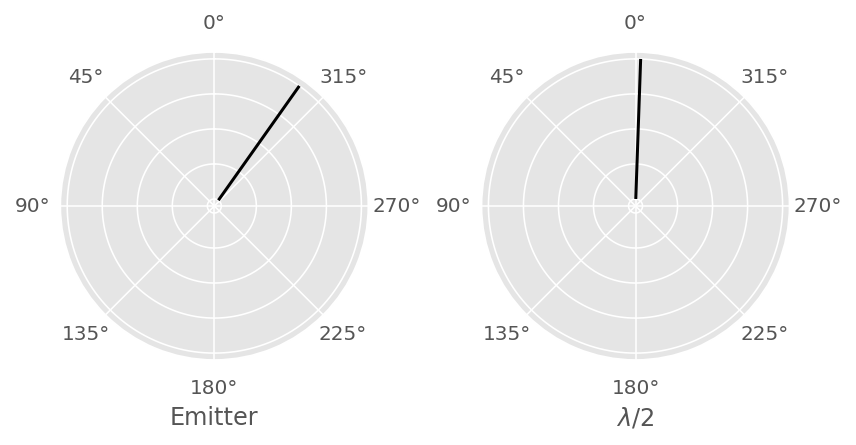

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(6,8), subplot_kw=dict(projection='polar'))
plt.tight_layout()
axarr[0].vlines(np.deg2rad(-35.3),0,2), axarr[1].vlines(-np.deg2rad(2),0,2)
axarr[0].set_theta_zero_location('N'), axarr[0].set_yticklabels([]), axarr[0].set_xlabel('Emitter');
axarr[1].set_theta_zero_location('N'), axarr[1].set_yticklabels([]), axarr[1].set_xlabel(r'$\lambda/2$');

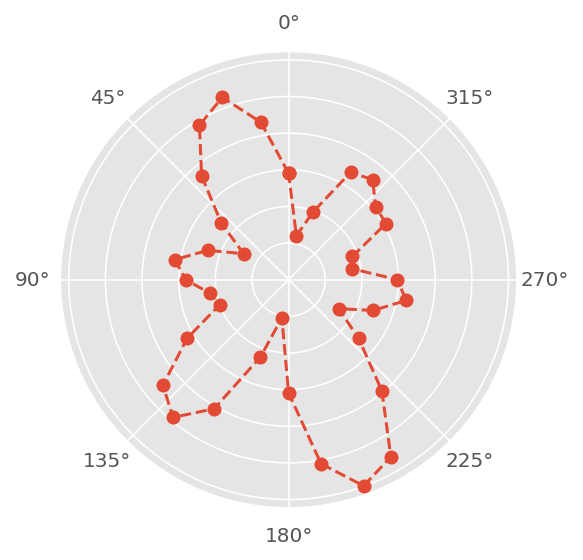

In [6]:
delay = np.loadtxt('data/emitter_-35deg/10.txt')[:,0]
data = np.zeros((37, len(delay)))
amps = np.zeros(data.shape[0])

for i in range(data.shape[0]):
    filename = 'data/emitter_-35deg/{}'.format(10*i % 360) + '.txt'
    data[i, :] = np.flip(np.loadtxt(filename)[:, 1])
    data[i, :] *= 10e5
    amps[i] = np.max(data[i, :])-np.min(data[i, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('N'), ax.set_yticklabels([]);
plt.plot(np.linspace(0, 2*np.pi, data.shape[0]), amps, marker='o', linestyle='--'), plt.tight_layout();

---
Emitter $\theta = 0^\circ$ (pump polarized along $\langle \overline{1}10\rangle $). Theoretical THz polarization is $90^\circ$. Pump is filtered with one slab of Teflon.

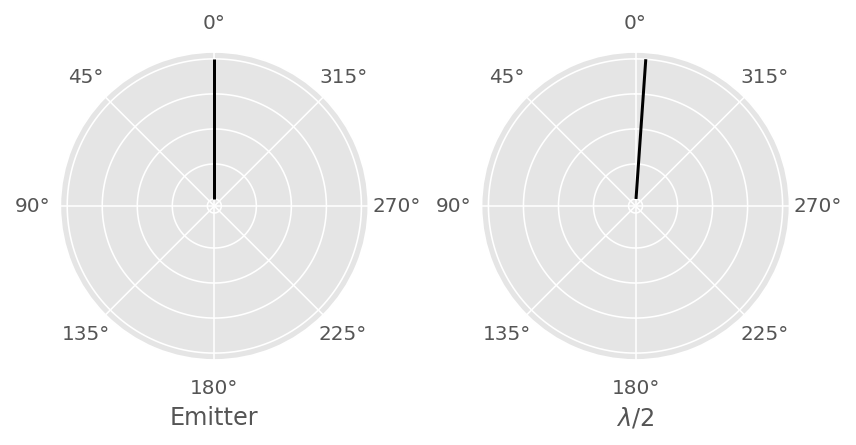

In [7]:
fig, axarr = plt.subplots(1, 2, figsize=(6,8), subplot_kw=dict(projection='polar'))
plt.tight_layout()
axarr[0].vlines(np.deg2rad(0),0,2), axarr[1].vlines(-np.deg2rad(4),0,2)
axarr[0].set_theta_zero_location('N'), axarr[0].set_yticklabels([]), axarr[0].set_xlabel('Emitter');
axarr[1].set_theta_zero_location('N'), axarr[1].set_yticklabels([]), axarr[1].set_xlabel(r'$\lambda/2$');

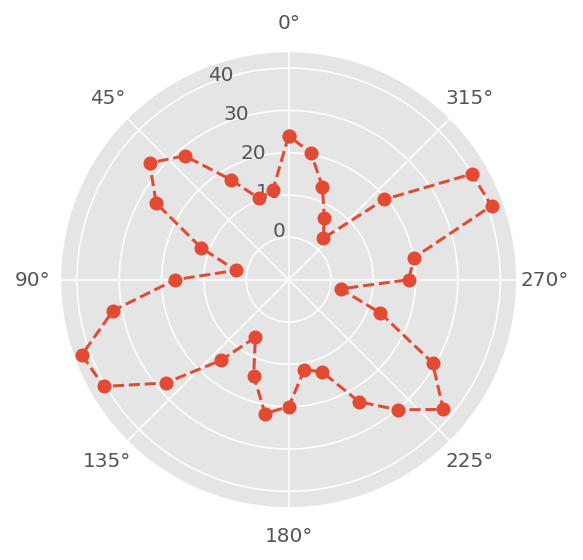

In [8]:
delay = np.loadtxt('data/emitter_0deg/0.txt')[:, 0]
angles = np.array([i%360 for i in range(0, 370, 10)])
data = np.zeros((angles.shape[0], len(delay)))
amps = np.zeros(data.shape[0])

for i in range(angles.shape[0]):
    filename = 'data/emitter_0deg/{}'.format(angles[i]) + '.txt'
    data[i, :] = np.flip(np.loadtxt(filename)[:, 1])
    data[i, :] *= 10e5
    amps[i] = np.max(data[i, :])-np.min(data[i, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('N'), ax.set_yticklabels(angles);
plt.plot((np.pi/180)*angles, amps, marker='o', linestyle='--'), plt.tight_layout();

---
Emitter $\theta = 90^\circ$ (pump polarized along $\langle 001 \rangle $). Theoretical THz polarization is $90^\circ$. Pump is filtered with one slab of Teflon.

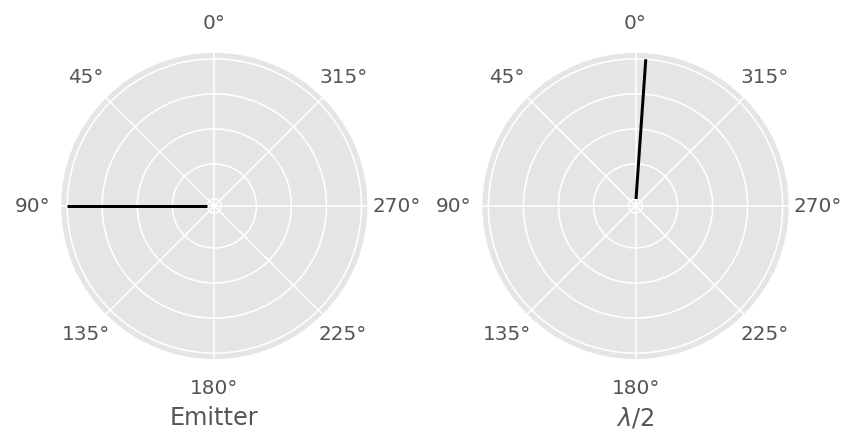

In [9]:
fig, axarr = plt.subplots(1, 2, figsize=(6,8), subplot_kw=dict(projection='polar'))
plt.tight_layout()
axarr[0].vlines(np.deg2rad(90),0,2), axarr[1].vlines(-np.deg2rad(4),0,2)
axarr[0].set_theta_zero_location('N'), axarr[0].set_yticklabels([]), axarr[0].set_xlabel('Emitter');
axarr[1].set_theta_zero_location('N'), axarr[1].set_yticklabels([]), axarr[1].set_xlabel(r'$\lambda/2$');